### Libraries

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Importing the Crime Data

In [30]:
data = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

### Settings

In [31]:
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 35)

### Check the Dataset

In [32]:
data.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4018830907041,40188309,7041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.500000,90.000000,POINT (-120.50000000000001 90),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13605159706372,136051597,6372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,1300 Block of STEVENSON ST,-122.421595,37.770767,POINT (-122.421594519119 37.7707674171464),32.0,1.0,10.0,20.0,8.0,2.0,9.0,28853.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
2,13618826906244,136188269,6244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,10/08/2013,19:30,MISSION,NONE,VALENCIA ST / DUBOCE AV,-122.422367,37.769868,POINT (-122.422367409563 37.7698682392455),NaN,3.0,5.0,20.0,8.0,4.0,5.0,28853.0,19.0,NaN,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN
3,4098938926105,40989389,26105,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,08/29/2004,22:47,PARK,NONE,300 Block of WOODSIDE AV,-122.452717,37.745745,POINT (-122.452716700987 37.7457451434135),49.0,7.0,8.0,38.0,1.0,5.0,4.0,59.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,49.0
4,5085058207021,50850582,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,07/29/2005,21:00,INGLESIDE,NONE,0 Block of RAE AV,-122.448127,37.712164,POINT (-122.448127287476 37.7121636146229),66.0,9.0,1.0,28.0,9.0,7.0,6.0,28861.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,66.0


In [33]:
data.columns

Index(['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript',
       'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X',
       'Y', 'location', 'SF Find Neighborhoods 2 2',
       'Current Police Districts 2 2', 'Current Supervisor Districts 2 2',
       'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2',
       'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2',
       'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2',
       'DELETE - 2017 Fix It Zones 2 2',
       'Civic Center Harm Reduction Project Boundary 2 2',
       'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2',
       'Fix It Zones as of 2018-02-07 2 2',
       'CBD, BID and GBD Boundaries as of 2017 2 2',
       'Areas of Vulnerability, 2016 2 2',
       'Central Market/Tenderloin Boundary 2 2',
       'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
       'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2',
       

### Number of Crimes per Weekday

In [34]:
num_cri_weekday = data['DayOfWeek'].value_counts()
print(num_cri_weekday)

Friday       328671
Wednesday    315954
Saturday     313565
Thursday     308132
Tuesday      306896
Monday       298871
Sunday       288864
Name: DayOfWeek, dtype: int64


### Creating Year Column

In [35]:
data['Year'] = data['Date'].str.strip().str[-4:]

### Focus Crimes

In [36]:
focus_crimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

focus_data = data[['Category', 'Year', 'DayOfWeek']].copy()
focus_data = focus_data[focus_data['Category'].isin(focus_crimes)].reset_index(drop=True)
focus_data = focus_data.drop(focus_data[focus_data['Year'] == '2018'].index)

### 14 Focus Crimes Bar Plots (Weekdays)

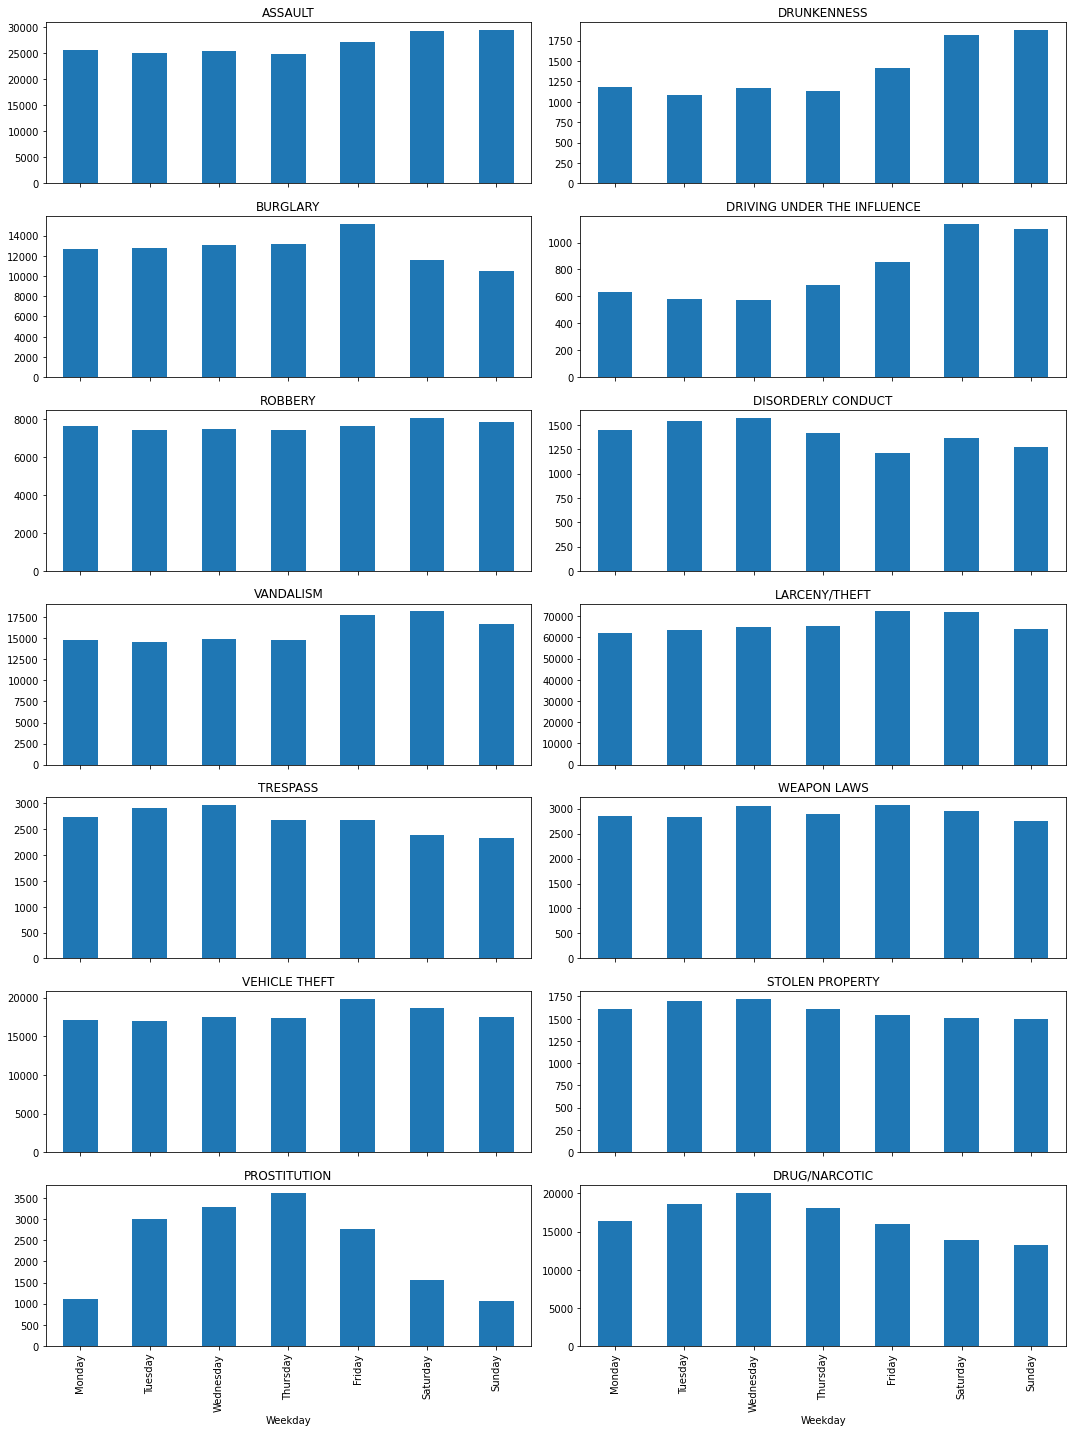

In [37]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,20), sharex=True)

col = ['Weekday', 'Occurences']

for i, crime in enumerate(focus_crimes):
    crime_data = focus_data[focus_data['Category'] == crime]['DayOfWeek'].value_counts()
    crime_dataframe = pd.DataFrame(crime_data.reset_index())
    crime_dataframe.columns = col
    crime_dataframe['Weekday'] = pd.Categorical(crime_dataframe['Weekday'],categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],ordered=True)
    crime_dataframe = crime_dataframe.sort_values('Weekday',ascending=True)
    
    crime_dataframe.plot(kind='bar', x='Weekday', y='Occurences', title=crime, ax=axes[i//2,i%2], legend=False)
    
fig.tight_layout()

### Creating Month Column

In [38]:
data['Month'] = data['Date'].str.strip().str[0:2]

data['Month'] = data['Month'].str.replace('01', 'January')
data['Month'] = data['Month'].str.replace('02', 'February')
data['Month'] = data['Month'].str.replace('03', 'March')
data['Month'] = data['Month'].str.replace('04', 'April')
data['Month'] = data['Month'].str.replace('05', 'May')
data['Month'] = data['Month'].str.replace('06', 'June')
data['Month'] = data['Month'].str.replace('07', 'July')
data['Month'] = data['Month'].str.replace('08', 'August')
data['Month'] = data['Month'].str.replace('09', 'September')
data['Month'] = data['Month'].str.replace('10', 'October')
data['Month'] = data['Month'].str.replace('11', 'November')
data['Month'] = data['Month'].str.replace('12', 'December')

### Focus Crime

In [39]:
focus_data = data[['Category', 'Year', 'Month']].copy()
focus_data = focus_data[focus_data['Category'].isin(focus_crimes)].reset_index(drop=True)
focus_data = focus_data.drop(focus_data[focus_data['Year'] == '2018'].index)

### Number of Crimes per Months

In [40]:
num_cri_months = data['Month'].value_counts()
print(num_cri_months)

January      192649
March        192331
October      185582
April        184948
August       183723
May          182679
September    178989
July         178021
February     173720
June         170718
November     170677
December     166916
Name: Month, dtype: int64


### 14 Focus Crimes Bar Plots (Months)

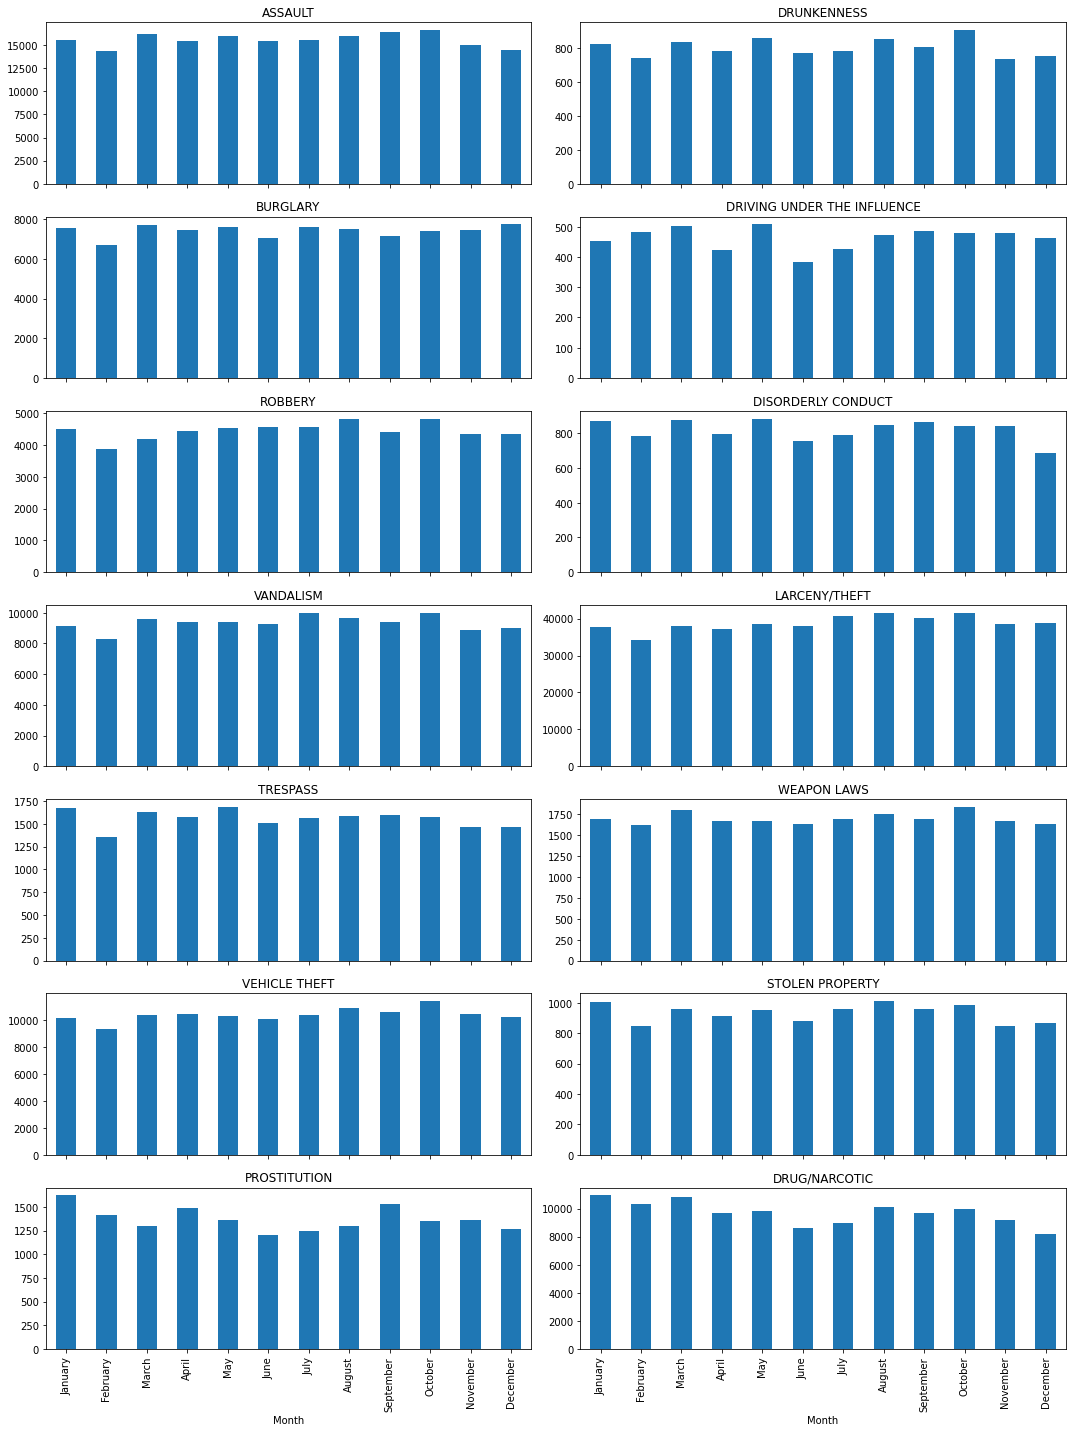

In [41]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,20), sharex=True)

col = ['Month', 'Occurences']

for i, crime in enumerate(focus_crimes):
    crime_data = focus_data[focus_data['Category'] == crime]['Month'].value_counts()
    crime_dataframe = pd.DataFrame(crime_data.reset_index())
    crime_dataframe.columns = col
    crime_dataframe['Month'] = pd.Categorical(crime_dataframe['Month'],categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],ordered=True)
    crime_dataframe = crime_dataframe.sort_values('Month',ascending=True)
    
    crime_dataframe.plot(kind='bar', x='Month', y='Occurences', title=crime, ax=axes[i//2,i%2], legend=False)
    
fig.tight_layout()

### Creating the Hour Column

In [42]:
data['Hour'] = data['Time'].str.strip().str[0:2]

In [43]:
data['Hour'] = data['Time'].str.strip().str[0:2]

data['Hour'] = data['Hour'].str.replace('00', 'Midnight - 1am')
data['Hour'] = data['Hour'].str.replace('01', '1am - 2am')
data['Hour'] = data['Hour'].str.replace('02', '2am - 3am')
data['Hour'] = data['Hour'].str.replace('03', '3am - 4am')
data['Hour'] = data['Hour'].str.replace('04', '4am - 5am')
data['Hour'] = data['Hour'].str.replace('05', '5am - 6am')
data['Hour'] = data['Hour'].str.replace('06', '6am - 7am')
data['Hour'] = data['Hour'].str.replace('07', '7am - 8am')
data['Hour'] = data['Hour'].str.replace('08', '8am - 9am')
data['Hour'] = data['Hour'].str.replace('09', '%temp1%').replace('10', '%temp2%').replace('11', '11am - Noon').replace('%temp2%', '10am - 11am').replace('%temp1%', '9am - 10am')
#data['Hour'] = data['Hour'].str.replace('09', '9am - 10am')
#data['Hour'] = data['Hour'].str.replace('10', '10am - 11am')
#data['Hour'] = data['Hour'].str.replace('11', '11am - Noon')
data['Hour'] = data['Hour'].str.replace('12', 'Noon - 1pm')
data['Hour'] = data['Hour'].str.replace('13', '1pm - 2pm')
data['Hour'] = data['Hour'].str.replace('14', '2pm - 3pm')
data['Hour'] = data['Hour'].str.replace('15', '3pm - 4pm')
data['Hour'] = data['Hour'].str.replace('16', '4pm - 5pm')
data['Hour'] = data['Hour'].str.replace('17', '5pm - 6pm')
data['Hour'] = data['Hour'].str.replace('18', '6pm - 7pm')
data['Hour'] = data['Hour'].str.replace('19', '7pm - 8pm')
data['Hour'] = data['Hour'].str.replace('20', '8pm - 9pm')
data['Hour'] = data['Hour'].str.replace('21', '9pm - 10pm')
data['Hour'] = data['Hour'].str.replace('22', '10pm - 11pm')
data['Hour'] = data['Hour'].str.replace('23', '11pm - Midnight')

### Focus Crimes

In [44]:
focus_data = data[['Category', 'Year', 'Hour']].copy()
focus_data = focus_data[focus_data['Category'].isin(focus_crimes)].reset_index(drop=True)
focus_data = focus_data.drop(focus_data[focus_data['Year'] == '2018'].index)

### Number of Crimes per Hour

In [45]:
num_cri_hour = data['Hour'].value_counts()
print(num_cri_hour)

6pm - 7pm          137530
5pm - 6pm          132087
Noon - 1pm         129201
7pm - 8pm          123599
4pm - 5pm          121900
3pm - 4pm          116000
8pm - 9pm          112389
10pm - 11pm        111730
Midnight - 1am     111449
2pm - 3pm          108726
9pm - 10pm         107266
1pm - 2pm          105348
11pm - Midnight    103007
11am - Noon         94777
10am - 11am         92849
9am - 10am          86795
8am - 9am           79464
1am - 2am           64426
2am - 3am           53963
7am - 8am           53103
3am - 4am           35271
6am - 7am           32898
4am - 5am           24997
5am - 6am           22178
Name: Hour, dtype: int64


### 14 Focus Crimes Bar Plots (Hours)

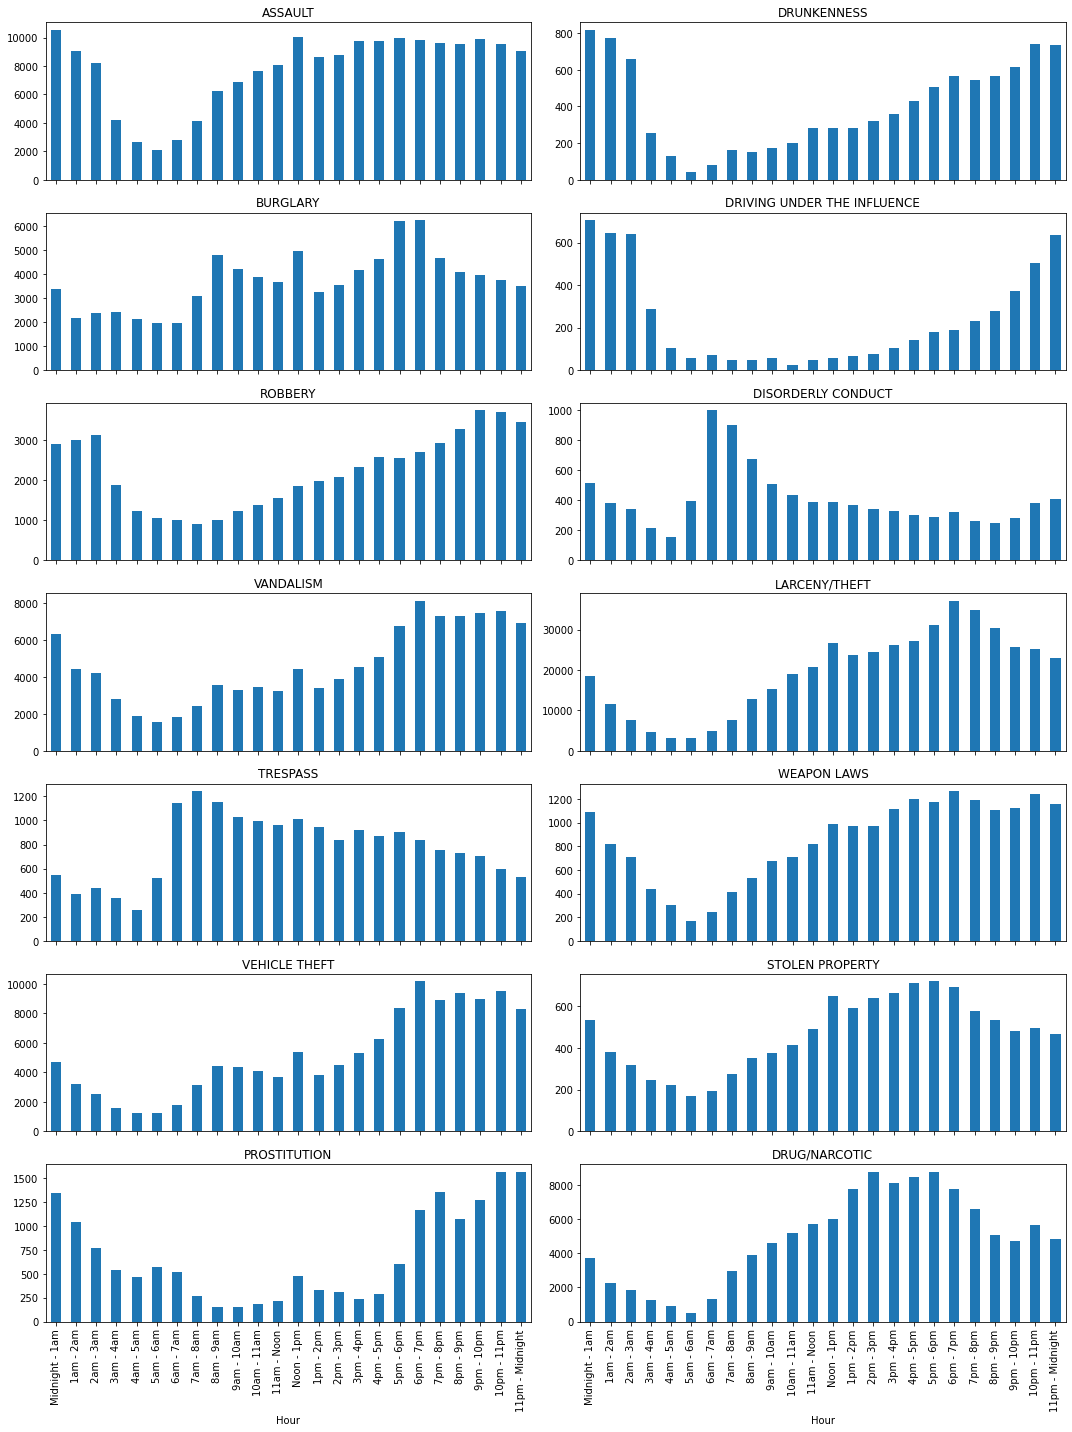

In [46]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,20), sharex=True)

col = ['Hour', 'Occurences']

for i, crime in enumerate(focus_crimes):
    crime_data = focus_data[focus_data['Category'] == crime]['Hour'].value_counts()
    crime_dataframe = pd.DataFrame(crime_data.reset_index())
    crime_dataframe.columns = col
    crime_dataframe['Hour'] = pd.Categorical(crime_dataframe['Hour'],categories=['Midnight - 1am', '1am - 2am', '2am - 3am', '3am - 4am', '4am - 5am', '5am - 6am', '6am - 7am', '7am - 8am', '8am - 9am', '9am - 10am', '10am - 11am', '11am - Noon', 'Noon - 1pm', '1pm - 2pm', '2pm - 3pm', '3pm - 4pm', '4pm - 5pm', '5pm - 6pm', '6pm - 7pm', '7pm - 8pm', '8pm - 9pm', '9pm - 10pm', '10pm - 11pm', '11pm - Midnight'],ordered=True)
    crime_dataframe = crime_dataframe.sort_values('Hour',ascending=True)
    
    crime_dataframe.plot(kind='bar', x='Hour', y='Occurences', title=crime, ax=axes[i//2,i%2], legend=False)
    
fig.tight_layout()

### Creating the Weekhour Column

In [47]:
data['int_hour'] = pd.to_datetime(data['Time'], format = '%H:%M').dt.hour
data['int_day'] = data['DayOfWeek'].str.replace('Monday', '0').replace('Tuesday', '24').replace('Wednesday', '48').str.replace('Thursday', '72').str.replace('Friday', '96').str.replace('Saturday', '120').str.replace('Sunday', '144')
data['int_day'] = data['int_day'].astype(int)
data['Weekhour'] = data['int_hour'] + data['int_day']

### Focus Crimes

In [48]:
focus_data = data[['Category', 'Year', 'Weekhour']].copy()
focus_data = focus_data[focus_data['Category'].isin(focus_crimes)].reset_index(drop=True)
focus_data = focus_data.drop(focus_data[focus_data['Year'] == '2018'].index)

### 14 Focus Crimes Bar Plots (Weekhours)

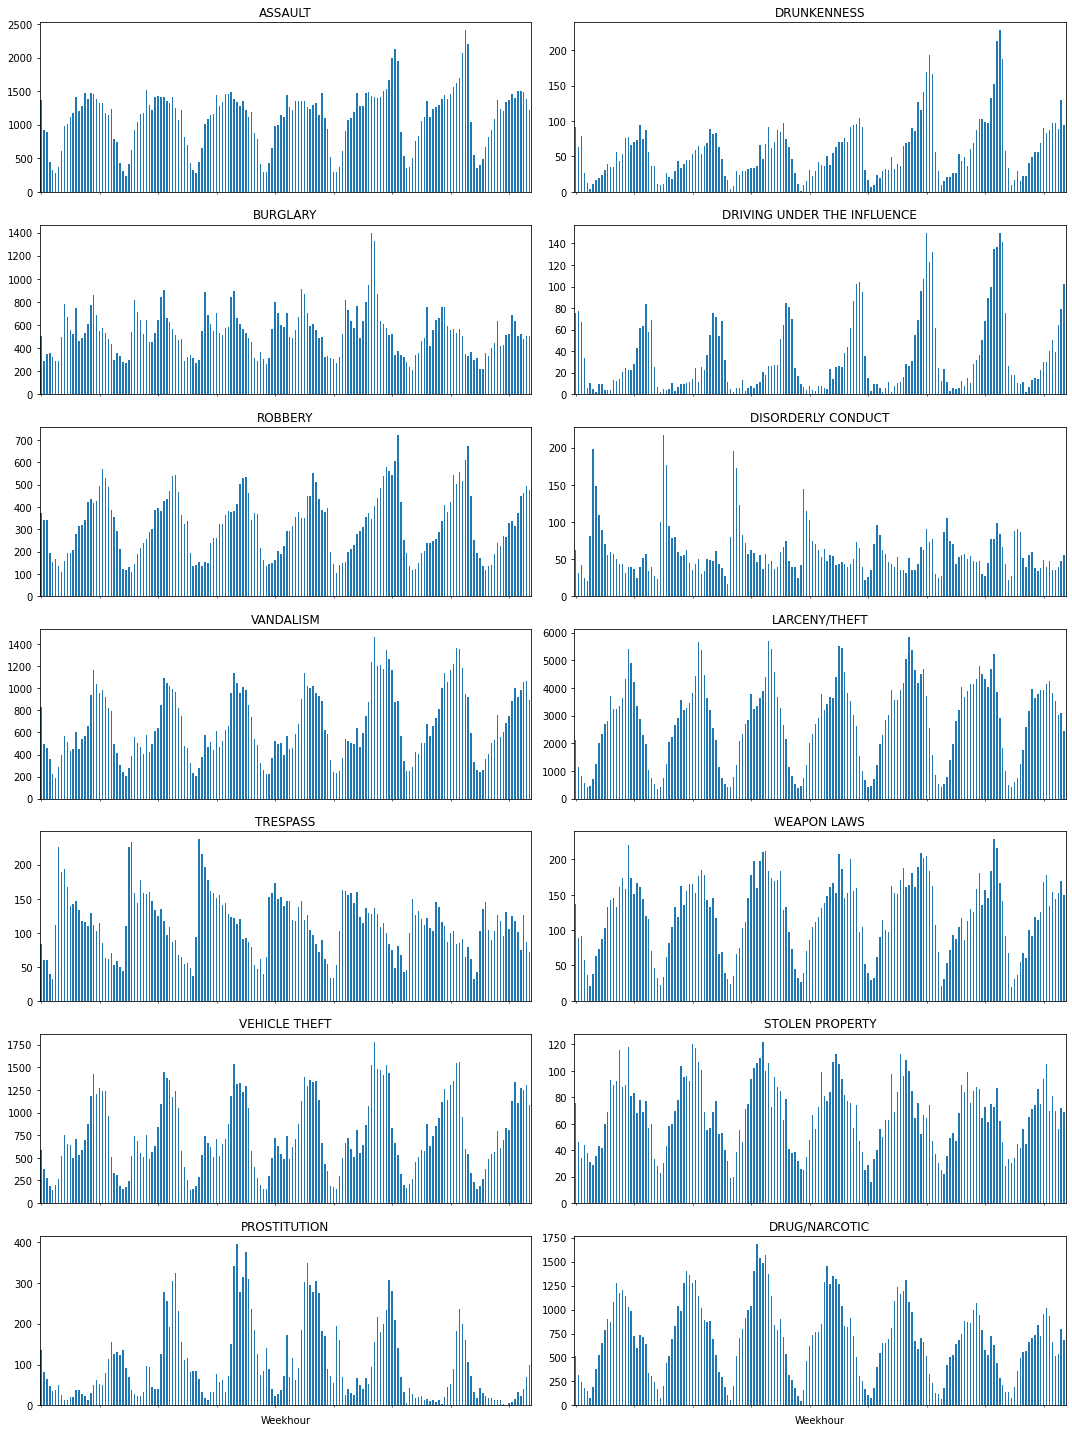

In [49]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,20), sharex=True)

col = ['Weekhour', 'Occurences']

for i, crime in enumerate(focus_crimes):
    crime_data = focus_data[focus_data['Category'] == crime]['Weekhour'].value_counts()
    crime_dataframe = pd.DataFrame(crime_data.reset_index())
    crime_dataframe.columns = col
    crime_dataframe = crime_dataframe.sort_values(by=['Weekhour'])
    
    crime_dataframe.plot(kind='bar', x='Weekhour', y='Occurences', title=crime, ax=axes[i//2,i%2], legend=False)

plt.xticks([]) 

plt.savefig('Weekhours.png')
fig.tight_layout()

### Names of San Francisco's Police Districts

In [50]:
SFPD = list(data['PdDistrict'].unique())
SFPD.pop()
SFPD.sort()

print(SFPD)

['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']


### Police District with Most Crimes

In [51]:
data['PdDistrict'].value_counts()

SOUTHERN      394234
MISSION       293072
NORTHERN      269229
CENTRAL       223962
BAYVIEW       210729
TENDERLOIN    189034
INGLESIDE     186645
TARAVAL       158710
PARK          121070
RICHMOND      114267
Name: PdDistrict, dtype: int64

### Police District with Most Focus Crimes

In [52]:
focus_data = data[['Category', 'Year', 'PdDistrict']].copy()
focus_data = focus_data[focus_data['Category'].isin(focus_crimes)].reset_index(drop=True)
focus_data = focus_data.drop(focus_data[focus_data['Year'] == '2018'].index)

focus_data['PdDistrict'].value_counts()

SOUTHERN      223982
NORTHERN      170165
MISSION       161954
CENTRAL       137437
BAYVIEW       113779
TENDERLOIN    105087
INGLESIDE     103724
TARAVAL        88655
PARK           67419
RICHMOND       66264
Name: PdDistrict, dtype: int64

### P(crime)

In [53]:
total_crimes = len(focus_data)
col = ['Category', 'Occurences']

prob_data = pd.DataFrame(focus_data['Category'].value_counts().reset_index())
prob_data.columns = col

prob_data['Crime Probability'] = prob_data['Occurences']/total_crimes

### P(crime | district)

In [54]:
grouped_data = pd.DataFrame(focus_data.groupby(["PdDistrict", "Category"])["Category"].count())
grouped_data.columns = ['Occurences']

grouped_data['Crime Probability'] = grouped_data/grouped_data.groupby(level=0).sum()

### P(crime | district) / P(crime)

In [55]:
temp_list = []

for i in SFPD:
    temp_category = pd.DataFrame(grouped_data.transpose()[i].iloc[1].reset_index())
    temp = pd.merge(prob_data, temp_category, on="Category")
    temp['Ratio'] = temp['Crime Probability_y'] / temp['Crime Probability_x']
    temp = temp.sort_values(by = 'Category').reset_index(drop=True)
    
    temp_list.extend(list(temp['Ratio']))
    
grouped_data['Ratio'] = temp_list

### 14 Focus Crimes Bar Plots (Ratio)

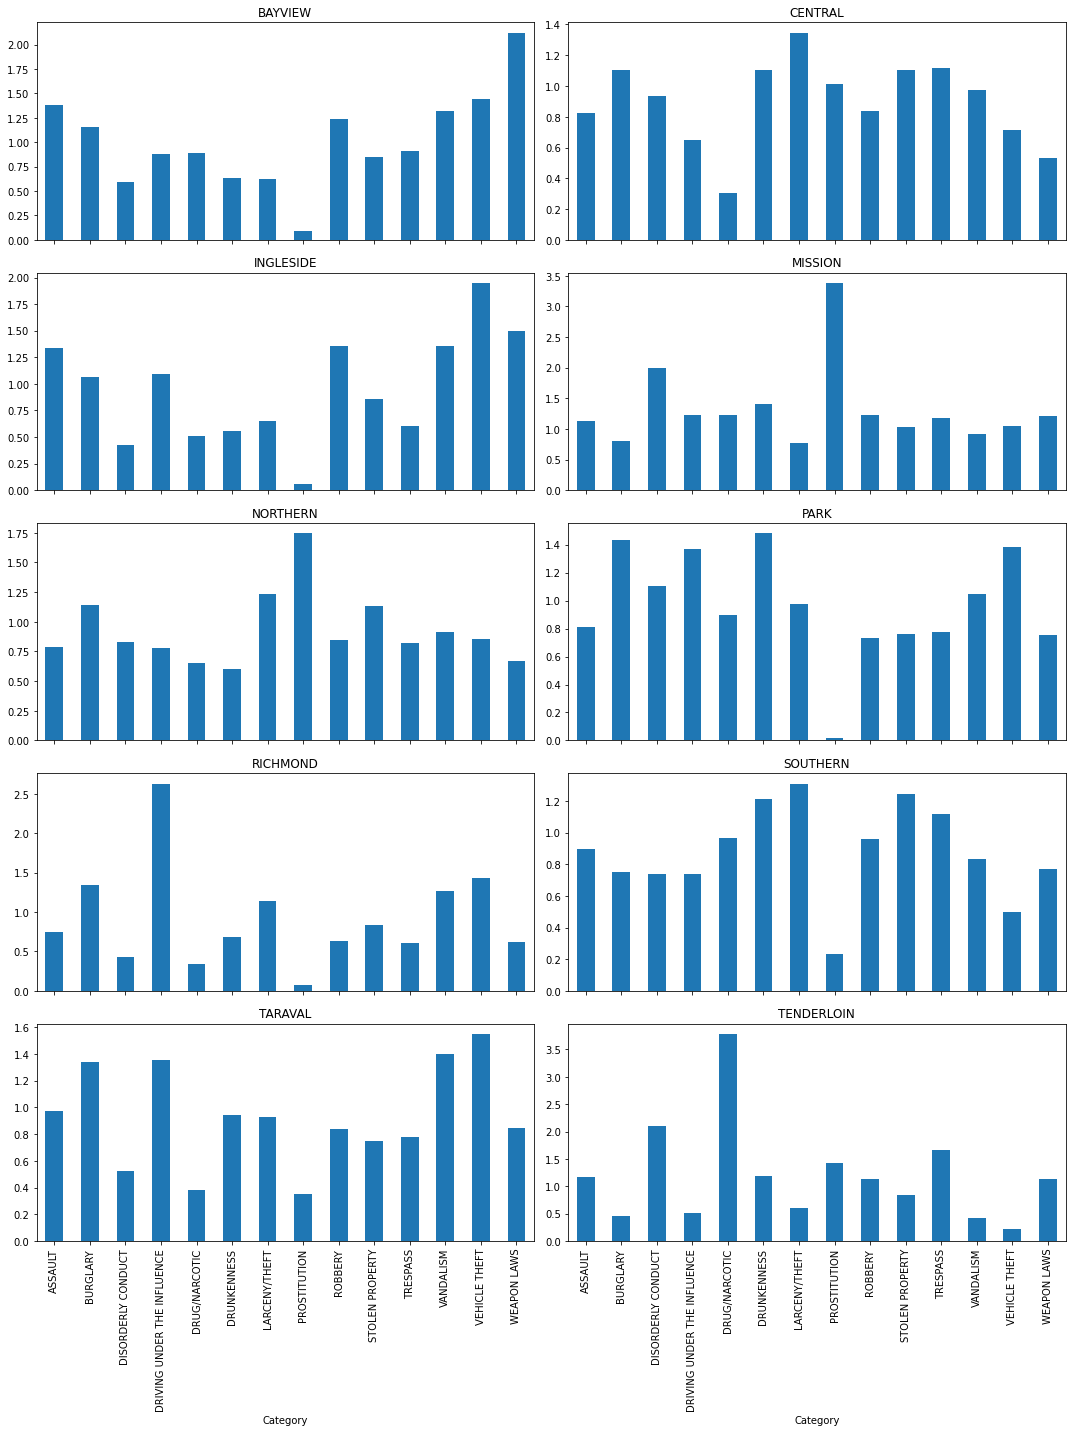

In [56]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,20), sharex=True)

col = ['Category', 'Ratio']

for i, pD in enumerate(SFPD):
    ratio_data = pd.DataFrame(grouped_data.transpose()[pD]).transpose().reset_index()    
    ratio_data.plot(kind='bar', x='Category', y='Ratio', title=pD, ax=axes[i//2,i%2], legend=False)
   
fig.tight_layout()